In [2]:
import fssa
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d
from scipy.interpolate import interp1d
import glob
from scipy import signal


In [3]:
#32 sites
file_name = '2023_01_2*L32.npy' 
data = []
data_path = glob.glob(('C:/Users/wangy/Rydberg simulation/rydberg_data/1_22_23/'+file_name))


In [4]:
for path in data_path:
    data.append(np.load(path,allow_pickle=True).tolist())

In [5]:
selected_data = []
for i in range(len(data)):
    if data[i]['params']['U']==8:
        selected_data.append(data[i])
selected_data = sorted(selected_data, key=lambda selected_data: selected_data['params']['T_DiLILA'])   # sort by age

N = []
t = []
detuning = [] 
rabi = [] 
E = [] 
overlap = []
z_list = []
zz_list = []
zg_list = []
zzg_list = []
for i in range(len(selected_data)):
    N.append(selected_data[i]['params']['L'])
    t.append(np.array(selected_data[i]['nT'])[:,1]) # scan time
    detuning.append(np.array(selected_data[i]['nT'])[:,3]) # detuning
    rabi.append(np.array(selected_data[i]['nT'])[:,2]) # Rabi
    E.append(np.array(selected_data[i]['E'])) # energy for the lowest three states
    overlap.append(np.array(selected_data[i]['overlap']))# overlap with fm, afm, ground state, 1st excited state, 2nd excited state
    z_list.append(np.array(selected_data[i]['z'])) # rydberg population  
    zz_list.append(np.array(selected_data[i]['zz']))# correlation of the rydbegrg population
    zg_list.append(np.array(selected_data[i]['zg']))# rydberg population for the ground state
    zzg_list.append(np.array(selected_data[i]['zzg']))# correlation of the rydberg population for the ground state
    print('i',i)
    print('T_DiLILA',selected_data[i]['params']['T_DiLILA'])
    print(zzg_list[i].shape)

i 0
T_DiLILA 8.0
(174, 32, 32)
i 1
T_DiLILA 12.0
(251, 32, 32)
i 2
T_DiLILA 18.0
(367, 32, 32)
i 3
T_DiLILA 24.0
(482, 32, 32)
i 4
T_DiLILA 30.0
(597, 32, 32)


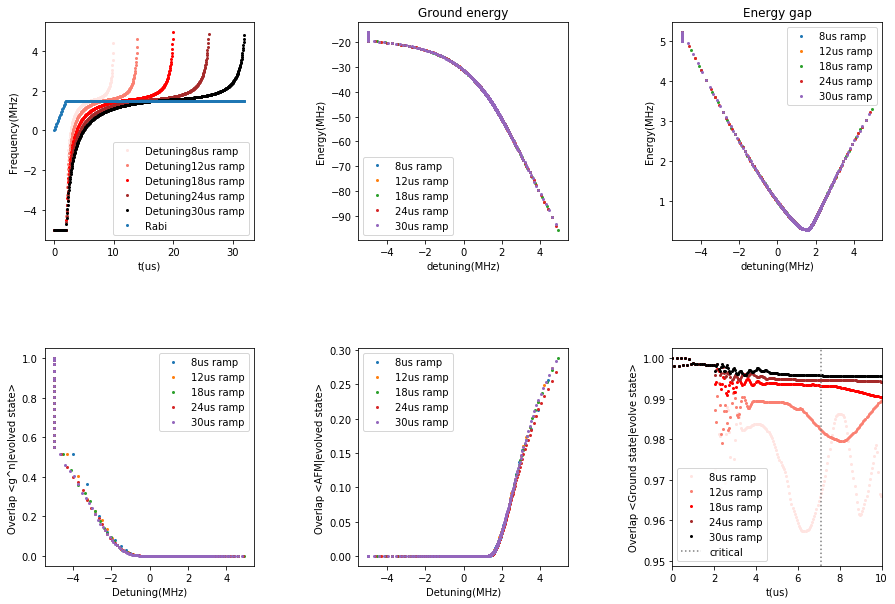

In [6]:
ms = 2
ls = ''
fig, ax = plt.subplots(2, 3, figsize=(15,10))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
color_list = ['mistyrose', 'salmon','red','brown','black']
for i in range(len(N)):
    label0 = str(int(selected_data[i]['params']['T_DiLILA']))+'us ramp'
    ax[0,0].plot(t[i],detuning[i],marker='o',markersize = ms,ls = ls,label = 'Detuning'+label0 ,color = color_list[i])
    ax[0,1].plot(detuning[i],(E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[0,2].plot(detuning[i],(E[i][:,2]-E[i][:,0])/2/np.pi,marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,0].plot(detuning[i],overlap[i][:,0],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,1].plot(detuning[i],overlap[i][:,1],marker='o',markersize = ms,ls = ls,label= label0)
    ax[1,2].plot(t[i],overlap[i][:,2]+overlap[i][:,3],marker='o',markersize = ms,ls = ls,label= label0,color = color_list[i])
    #ax[1,2].plot(t[i],overlap[i][:,4],marker='o',markersize = ms,ls = ls,label= label0+'2nd excited',color = color_list[i])
ax[0,0].plot(t[i],rabi[i],marker='o',markersize = ms,ls = ls,label = 'Rabi')

ax[1,2].set_xlim([0,10])


ax[1,2].axvline(7.1,color = 'grey',ls = ':',label ='critical')
ax[0,0].set_xlabel('t(us)')
ax[0,0].set_ylabel('Frequency(MHz)')
#ax[0,0].set_title('Rabi or Detuning')
ax[0,0].legend()
ax[0,1].set_ylabel('Energy(MHz)')
ax[0,1].set_xlabel('detuning(MHz)')
ax[0,1].set_title('Ground energy')
ax[0,1].legend()
ax[0,2].set_ylabel('Energy(MHz)')
ax[0,2].set_xlabel('detuning(MHz)')
ax[0,2].set_title('Energy gap')
ax[0,2].legend()
ax[1,0].set_xlabel('Detuning(MHz)')
ax[1,0].set_ylabel('Overlap <g^n|evolved state>')
ax[1,0].legend()
ax[1,1].set_xlabel('Detuning(MHz)')
ax[1,1].set_ylabel('Overlap <AFM|evolved state>')
ax[1,1].legend()
ax[1,2].set_xlabel('t(us)')
ax[1,2].set_ylabel('Overlap <Ground state|evolve state>')
ax[1,2].legend()



In [7]:
crit_id_list = []
for i in range(len(N)):
    print('i =',i)
    label0 = str(int(selected_data[i]['params']['T_DiLILA']))+'us ramp'

    print(label0)
  #  print(np.array([gap,detuning[i]])
    gap = (E[i][:,2]-E[i][:,0])/2/np.pi
    crit_id = np.argmin(gap)
   # crit_id = np.argmin(abs(detuning[i]-(selected_data[i]['params']['Delta_crit'])))
    crit_id_list.append(crit_id)
    print('intial_detuning'+str(detuning[i][0]))
    print('intial_gap'+str(gap[0]))
    print('crit_id ', crit_id)
    print('crit_t'+str(t[i][crit_id]))
    print('crit_detuning'+str(detuning[i][crit_id]))
    print('crit_gap'+str(gap[crit_id]))
    print('final_detuning'+str(detuning[i][-1]))
    print('final_gap'+str(gap[-1]))

          
        

i = 0
8us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  107
crit_t6.523999999999982
crit_detuning1.5388092334861019
crit_gap0.2668860736107906
final_detuning4.401231527093104
final_gap2.8445691196283915
i = 1
12us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  150
crit_t8.759999999999966
crit_detuning1.537181170292571
crit_gap0.26688482980468675
final_detuning4.612280701753746
final_gap3.022571550511535
i = 2
18us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  215
crit_t12.13999999999994
crit_detuning1.5371811702925704
crit_gap0.26688483436136257
final_detuning4.943114543113704
final_gap3.2918872376733197
i = 3
24us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  280
crit_t15.519999999999914
crit_detuning1.5371811702925706
crit_gap0.26688483028192034
final_detuning4.854331450093334
final_gap3.220844998049281
i = 4
30us ramp
intial_detuning-5.0
intial_gap5.000000000000001
crit_id  346
crit_t18.951999999999888
crit_detuning1.538

In [8]:
sigma_1_list = []
sigma_2_list = []
x_list = []
for i in range(len(N)):
    sigma1 = [] # single body sigma field
    sigma2 = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zz'])):
        n_temp = np.array(selected_data[i]['z'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zz'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1.append(sigma_temp)
        
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2.append(temp_g)
    sigma2 = np.array(sigma2)
    sigma2 = sigma2.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_list.append(sigma1)   
    sigma_2_list.append(sigma2)
sigma_1_g_list = []
sigma_2_g_list = []
x_list = []
for i in range(len(N)):
    sigma1_g = [] # single body sigma field
    sigma2_g = [] # correlation of sigma field
    # do something
    sign = np.ones(N[i])
    sign[0::2]=-1
    x_temp = np.arange(N[i])
    x_list.append(x_temp)
    for t_index in range(len(selected_data[i]['zg'])):
        n_temp = np.array(selected_data[i]['zg'])[t_index] # rydberg population at time t
        n_temp_mean = np.mean(n_temp)
        nn_temp = np.array(selected_data[i]['zzg'])[t_index]
        sigma_temp = (n_temp[:]-n_temp_mean)*sign
        sigma1_g.append(sigma_temp)
        for x in x_temp:
            temp_g = (-1)**x *(nn_temp[0,x]-n_temp_mean*n_temp[0]-n_temp_mean*n_temp[x]+n_temp_mean**2)
            sigma2_g.append(temp_g)
    sigma2_g = np.array(sigma2_g)
    sigma2_g = sigma2_g.reshape(len(selected_data[i]['zg']),N[i])
    sigma_1_g_list.append(sigma1_g)   
    sigma_2_g_list.append(sigma2_g)
    

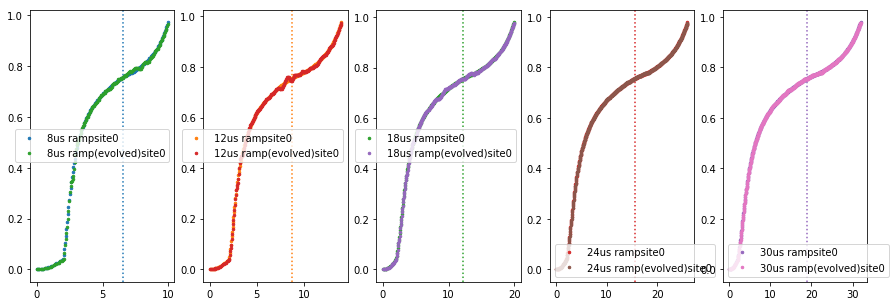

In [9]:
# rydberg state correlation with site m

m = 0
ms = 5
fig, ax = plt.subplots(1, len(N), figsize=(15,5))

for j_n, j in enumerate(range(len(N))):
    label0 = str(int(selected_data[j]['params']['T_DiLILA']))+'us ramp'

    ax[j].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
    ax[j].plot(t[j],zg_list[j][:,0]+zg_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'site0')        
    ax[j].plot(t[j],z_list[j][:,0]+z_list[j][:,1],markersize = ms,marker='.',color = 'C%d'%(j_n+2),ls = '',label= label0+'(evolved)'+'site0')
        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[j].legend()

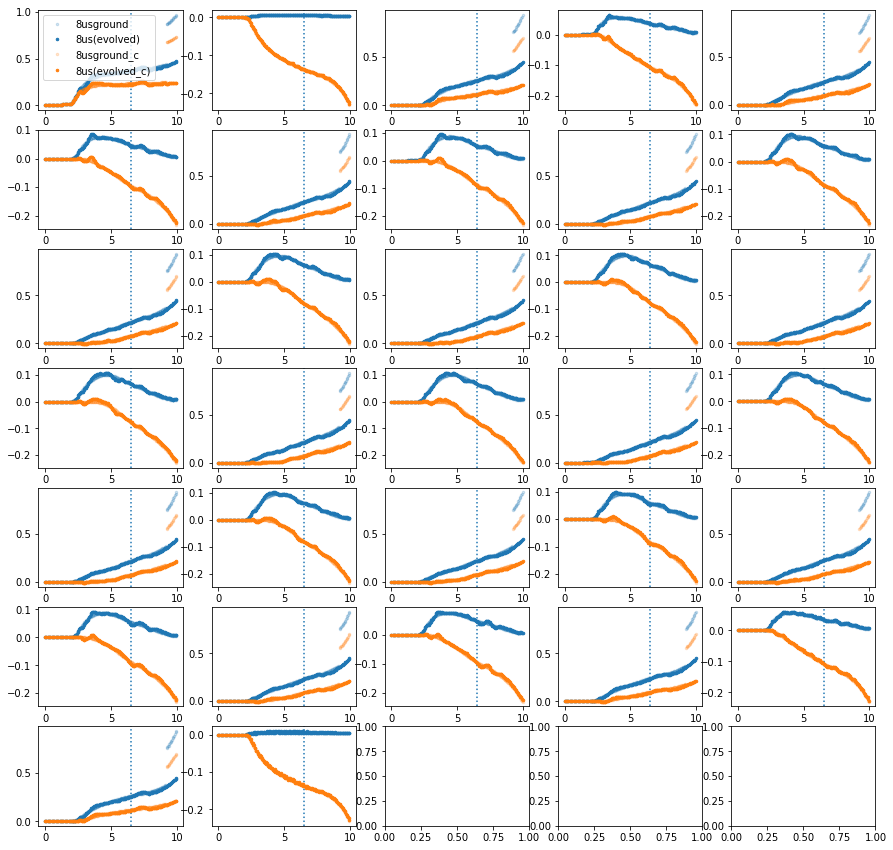

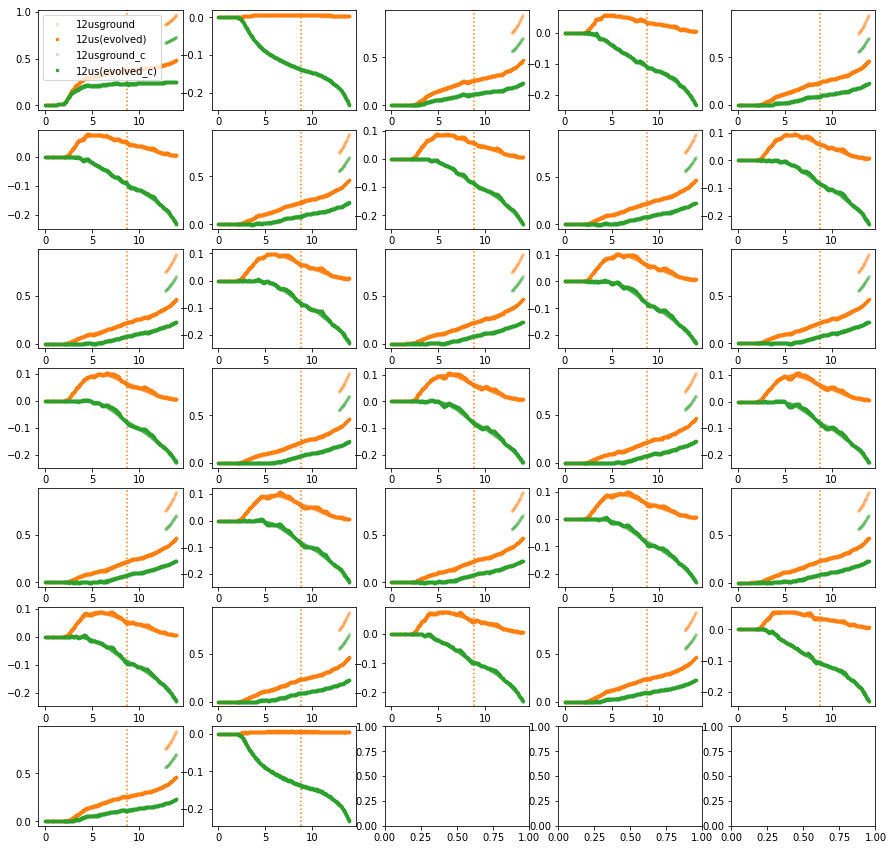

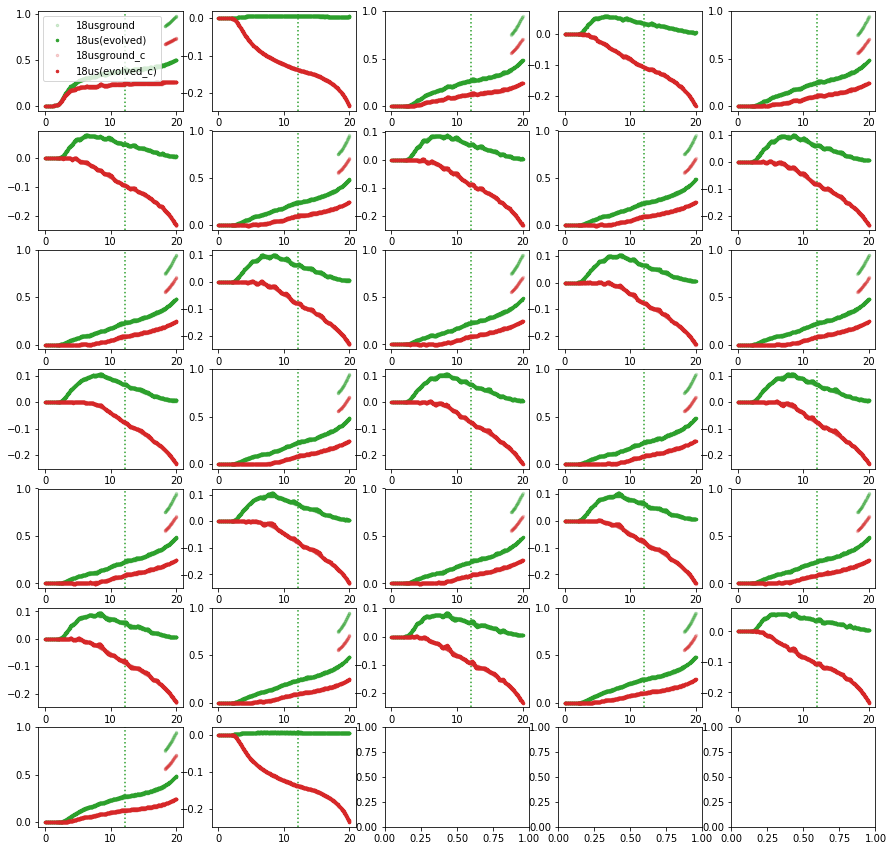

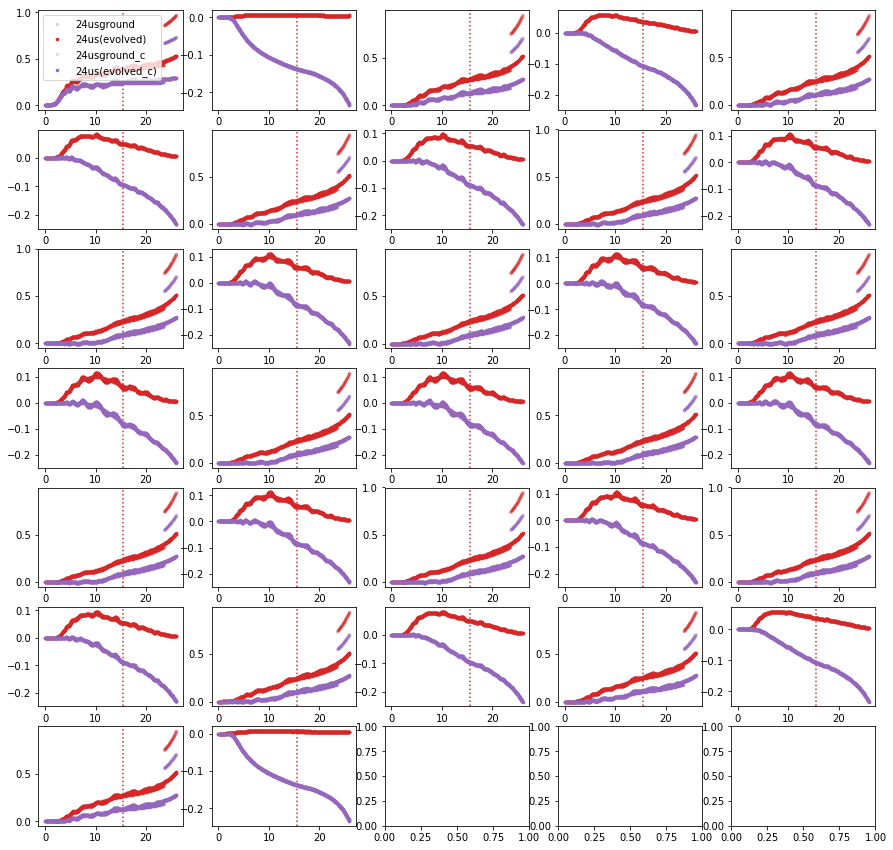

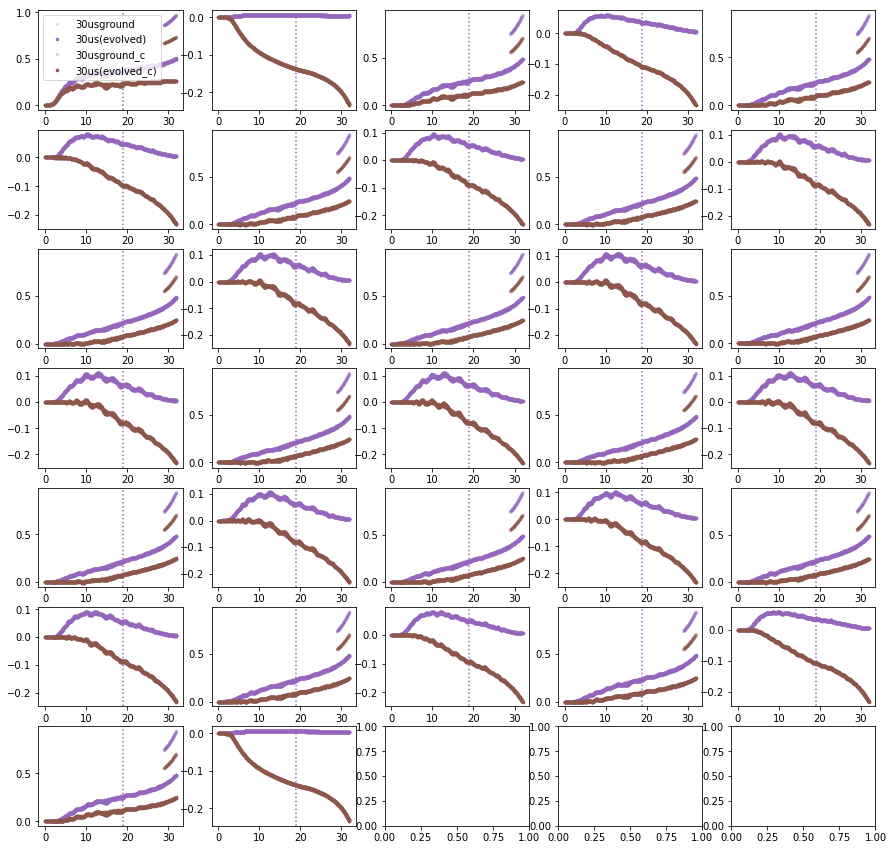

In [10]:
# rydberg state correlation with site m

m = 0
ms = 5
for j_n, j in enumerate(range(len(N))):
    fig, ax = plt.subplots(7, 5, figsize=(15,15))
    for i in range(N[j]):
#         print(t[j])
#         print(zzg_list[j][:,m,i])
        label0 = str(int(selected_data[j]['params']['T_DiLILA']))+'us'
        mean = np.mean(z_list[j][:],axis = 1)
        mean_g = np.mean(zg_list[j][:],axis = 1)
        ax[i//5,i%5].axvline(t[j][crit_id_list[j]],markersize = ms,ls = ':',color = 'C%d'%j_n)
        ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'ground',alpha = 0.2)        
        ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i],markersize = ms,marker='.',color = 'C%d'%j_n,ls = '',label= label0+'(evolved)')
        ax[i//5,i%5].plot(t[j],zzg_list[j][:,m,i]-mean_g**2,markersize = ms,marker='.',color = 'C%d'%(j_n+1),ls = '',label= label0+'ground_c',alpha = 0.2)        
        ax[i//5,i%5].plot(t[j],zz_list[j][:,m,i]-mean**2,markersize = ms,marker='.',color = 'C%d'%(j_n+1),ls = '',label= label0+'(evolved_c)')

        

       # ax[i//5,i%5].set_ylim([-0.1,1])
    ax[0,0].legend()

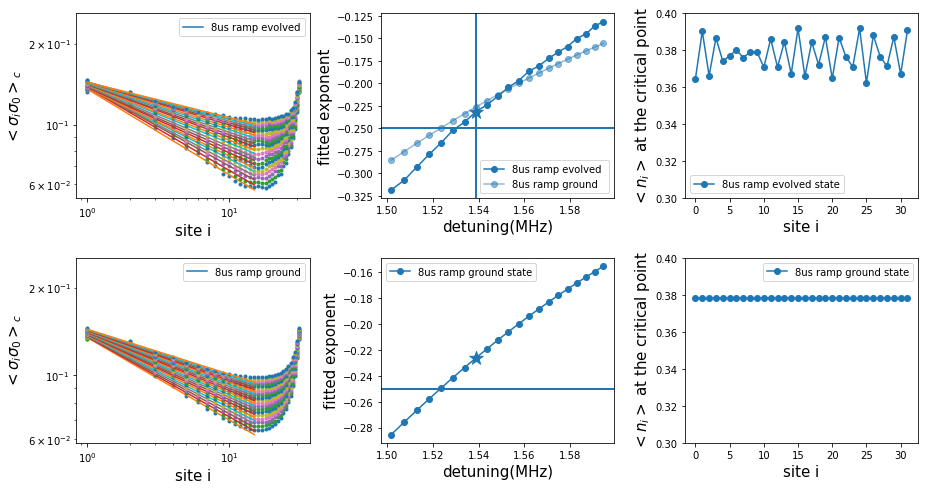

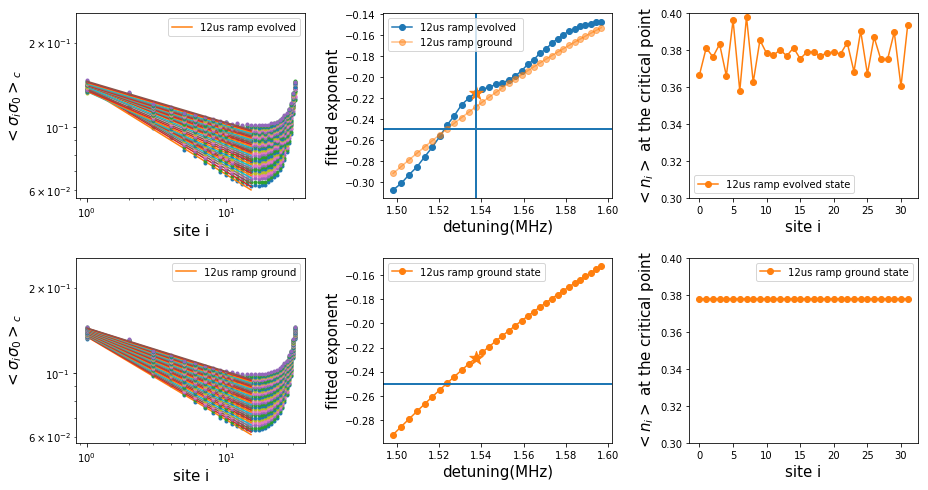

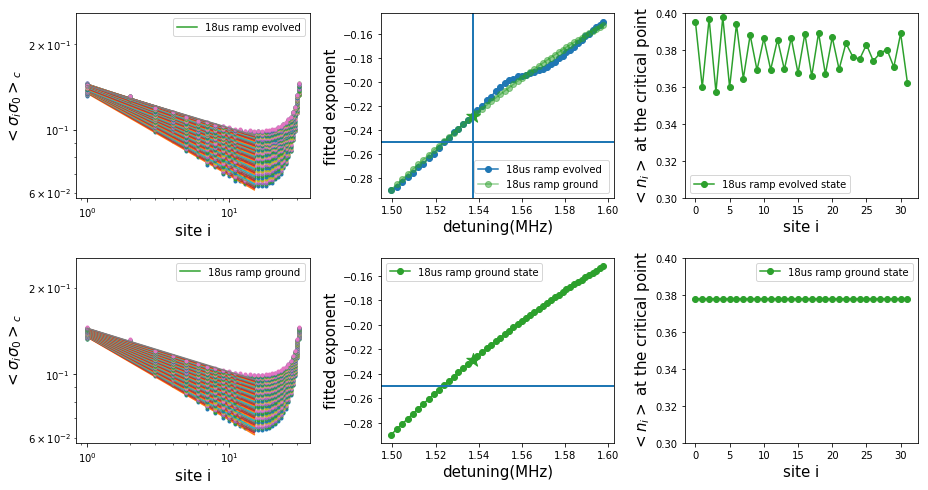

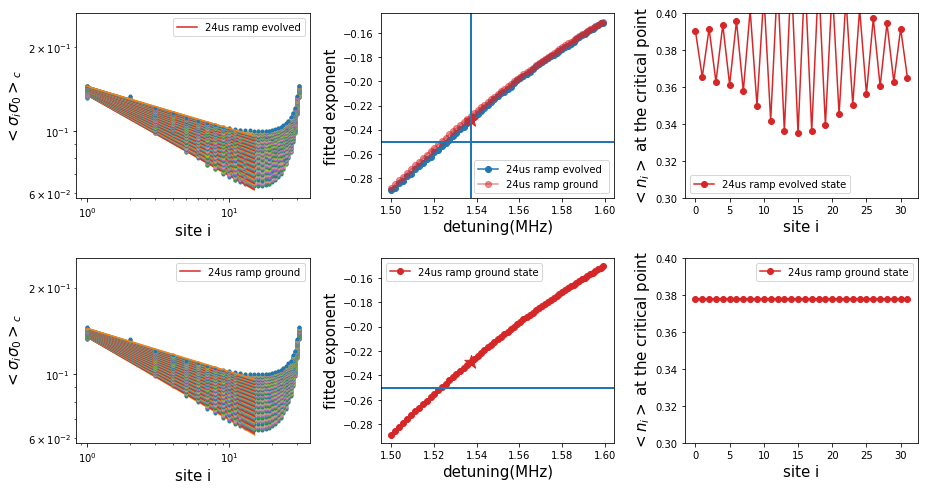

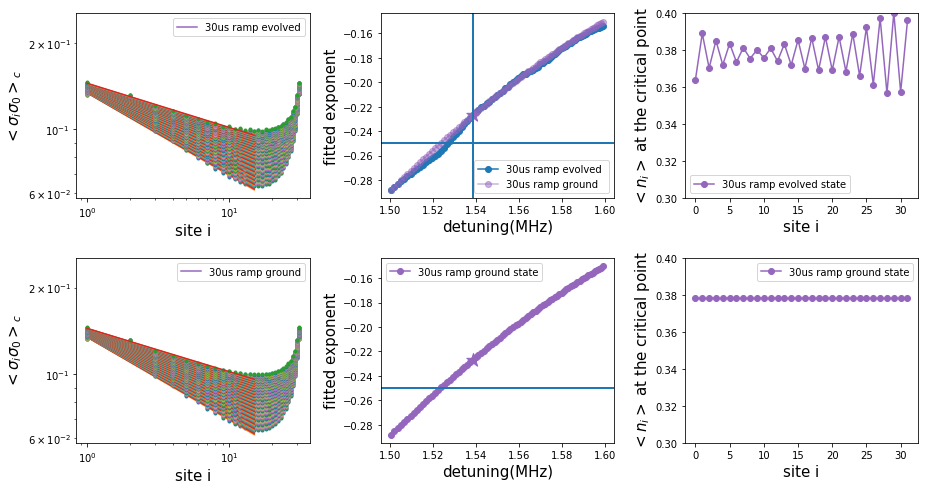

In [13]:
fs = 15
ms = 1
# the detuning range of interest
spacing = 1 # *0.052us
intial_detuning = 1.5
final_detuning = 1.6
def power_law(x, a, b):
    return a * x**b
marker_list = ['s','o','v','^']
exponent_list = []
exponent_g_list = []
for i_n,i in enumerate(range(len(N))):
    fig,ax = plt.subplots(ncols=3,nrows=2,figsize=(13,7))
    label0 = str(int(selected_data[i]['params']['T_DiLILA']))+'us ramp'

    ax[0,0].plot([],[],label = label0+' evolved',color='C%d'%i_n )
    ax[0,0].legend()
    ax[1,0].plot([],[],label = label0+' ground',color='C%d'%i_n )
    ax[1,0].legend()
    exponent = []
    exponent_g = []
    detuning_list = []
    initial_id = np.argmin(abs(detuning[i]-intial_detuning))
    final_id = np.argmin(abs(detuning[i]-final_detuning))
    #for it,t_id in enumerate(range(crit_id_list[i]-10,crit_id_list[i]+10,1)):
    for it,t_id in enumerate(range(initial_id,final_id,spacing)):

        detuning_list.append(detuning[i][t_id])
        ax[0,0].plot(x_list[i],sigma_2_list[i][t_id],marker = '.',ls = '' )
        ax[1,0].plot(x_list[i],sigma_2_g_list[i][t_id],marker = '.',ls = '')
        
        fit_range = int(N[i]/2-2)
        xdata = np.arange(1,fit_range)
        ydata = sigma_2_list[i][t_id,1:fit_range]
        params, params_covariance= curve_fit(power_law, xdata, ydata)
        xfit = np.linspace(1, fit_range+1, 100)
        yfit = power_law(xfit, params[0], params[1])
        exponent.append(params[1])
        
        xdata_g = np.arange(1,fit_range)
        ydata_g = sigma_2_g_list[i][t_id,1:fit_range]
        params_g, params_g_covariance= curve_fit(power_law, xdata_g, ydata_g)
        #print(N[i],detuning[i][t_id],params_g_covariance[1,1]**0.5/params_g[1])
        xfit_g = np.linspace(1, fit_range+1, 100)
        yfit_g = power_law(xfit_g, params_g[0], params_g[1])
        exponent_g.append(params_g[1])
        #print(detuning[i][t_id],params[1])
        ax[1,1].axhline(-0.25)
        ax[0,1].axhline(-0.25)
        ax[0,1].axvline(detuning[i][crit_id_list[i]])
        ax[0,0].plot(xfit, yfit, '-')
        ax[1,0].plot(xfit_g, yfit_g, '-')

    
        if t_id == crit_id_list[i]:
                ax[0,1].scatter(detuning[i][t_id],params[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)
                ax[1,1].scatter(detuning[i][t_id],params_g[1],s=200,color='C%d'%i_n,marker = '*',zorder = 2)

    ax[0,2].plot(np.arange(0,N[i]),z_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' evolved state',marker = 'o')

    ax[1,2].plot(np.arange(0,N[i]),zg_list[i][crit_id_list[i]],color='C%d'%i_n,label= label0+' ground state',marker = 'o')

               
       
    ax[0,1].plot(detuning_list,exponent,marker = 'o',ls = '-',zorder =1,label= label0+' evolved ')
    ax[0,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground ',alpha =0.5)

    ax[1,1].plot(detuning_list,exponent_g,marker = 'o',ls = '-',color='C%d'%i_n,zorder =1,label= label0+' ground state')
       
    ax[0,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[0,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[0,1].legend()
    ax[1,1].set_xlabel('detuning(MHz)',fontsize = fs)
    ax[1,1].set_ylabel('fitted exponent',fontsize = fs)
    ax[1,1].legend()
    exponent_list.append(exponent)
    ax[0,0].set_xlabel('site i',fontsize = fs)
    ax[0,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)
    ax[1,0].legend()

    ax[0,2].set_ylim([0.3,0.4])
    ax[0,2].set_xlabel('site i',fontsize = fs)
    ax[0,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[0,2].legend()

    exponent_g_list.append(exponent_g)
    ax[1,0].set_xlabel('site i',fontsize = fs)
    ax[1,0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = fs)    
    
    ax[1,2].set_ylim([0.3,0.4])
    ax[1,2].set_xlabel('site i',fontsize = fs)
    ax[1,2].set_ylabel('$<n_i>$ at the critical point',fontsize = fs)
    ax[1,2].legend()

    ax[0,0].set_xscale('log')
    ax[0,0].set_yscale('log')    
    ax[1,0].set_xscale('log')
    ax[1,0].set_yscale('log')  
    fig.tight_layout()
 #   plt.suptitle('ground state',fontsize=fs,x=0.53,y=1.05)    

# print('Correlatorof the evolved state'+ str(np.round(sigma2,5)))
# print('Correlator of the ground state'+ str(np.round(sigma2_g,5)

20
20
20
20
20


Text(0.5, 0, 'Detuning(MHz)')

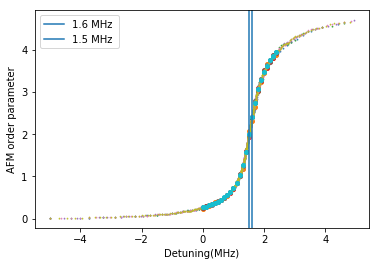

In [116]:
sampled_x = np.arange(0,2.5,0.1)
sampled_y = []
for i_n,i in enumerate(range(len(N))):
#for i_n,i in enumerate([0,1,3]):
    print(len(x_list[i]))
    temp = sigma_2_list[i]
    x = detuning[i][20:]
    y = np.sum(temp,axis=1)[20:]
    interp_func = interp1d(x, y)
    interp_y = interp_func(sampled_x)
    sampled_y.append(interp_y)
    plt.plot(x,y,marker = '^',markersize = 1, ls ='')
    plt.plot(sampled_x,interp_y,marker = 'o',markersize = 4,ls ='')
#plt.yscale('log')
plt.axvline(1.6,label = '1.6 MHz')
plt.axvline(1.5,label = '1.5 MHz ')
plt.legend()
sampled_y = np.array(sampled_y)
plt.ylabel('AFM order parameter')
plt.xlabel('Detuning(MHz)')
#plt.ylim([0.1,0.8])

In [106]:
# generate artificial scaling data from master curve
 # with rho_c == 1.0, nu == 2.0, zeta == 0.0
l = N
#l = [N[i] for i in [0,1,3]]
rho = sampled_x
l_mesh, rho_mesh = np.meshgrid(l, rho, indexing='ij')
y = sampled_y
dy = y / 100.
a = y
da = dy
res = fssa.autoscale(l=l, rho=rho, a=a, da=da, rho_c0=1.57, nu0=1., zeta0=1.)
res

           dnu: nan
          drho: 1554084.0922561819
         dzeta: 5564508.987064615
        errors: array([1554084.09225618,              nan, 5564508.98706461])
 final_simplex: (array([[1.64365432, 1.00941358, 0.99598765],
       [1.64607716, 1.00470679, 0.99799383],
       [1.63626466, 1.01095679, 0.99799383],
       [1.64218547, 1.00847801, 0.99563079]]), array([4.921891, 4.921891, 4.921891, 4.921891]))
           fun: 4.921890998392249
       message: 'Optimization terminated successfully.'
          nfev: 29
           nit: 10
            nu: 1.0094135802469135
           rho: 1.6436543209876544
        status: 0
       success: True
         varco: array([[ 2.41517737e+12,  1.94354472e+12, -1.38716092e+13],
       [ 1.94354472e+12, -1.59322472e+12,  4.17766117e+12],
       [-1.38716092e+13,  4.17766117e+12,  3.09637603e+13]])
             x: array([1.64365432, 1.00941358, 0.99598765])
          zeta: 0.9959876543209876

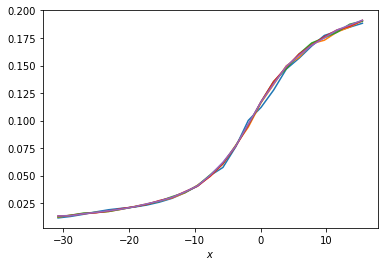

In [103]:
auto_scaled_data = fssa.scaledata(l, rho, a, da, res.rho, res.nu, res.zeta)
fig, ax = plt.subplots()
for i in range(len(auto_scaled_data.x)):
    ax.plot(auto_scaled_data.x[i,:],auto_scaled_data.y[i,:])

ax.set_xlabel(r'$x$')
plt.show()

In [104]:
print(res.zeta,res.dzeta)
print(res.nu,res.dnu)
print(res.rho,res.drho)

1.0229166666666667 1328194.3695927912
1.0125 1334126.3861548575
1.5964583333333335 2283260.8976167175
